In [1]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import tqdm
from sklearn.preprocessing import StandardScaler

c:\Users\georg\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\georg\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\georg\AppData\Local\Programs\Python\Python38\

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

First do wasserstein and disc accuracy plot

In [3]:
w_dists = [0.050274965660449096, 0.05947487443956896, 0.0676536302363531, 0.07852595008366355, 0.07559274625040605, 0.06916242566882934, 0.06724978514847954, 0.062439017614946524, 0.08080002011254868, 0.06758754692927446, 0.08823870997464338, 0.09511854121789387, 0.10320795148465635, 0.14545236477310702, 0.11428857466519848, 0.07179567335242376, 0.08292675345431046, 0.0938408750920327, 0.04656022847339678, 0.03206318126919683, 0.034898303022793405, 0.03519637543381564, 0.05043166682024485, 0.06395726672027549, 0.04087848006603549, 0.06443024945365992, 0.032207748044507906, 0.037220044515957736, 0.02925983241296601, 0.025377539165585897]
disc_accs = [0.5476190447807312, 0.5529100298881531, 0.5423280596733093, 0.5396825671195984, 0.5343915224075317, 0.5317460298538208, 0.5476190447807312, 0.5529100298881531, 0.5529100298881531, 0.5502645373344421, 0.5396825671195984, 0.5502645373344421, 0.5158730149269104, 0.6375661492347717, 0.5740740895271301, 0.5740740895271301, 0.5846560597419739, 0.6058201193809509, 0.5132275223731995, 0.5634920597076416, 0.5740740895271301, 0.5873016119003296, 0.5714285969734192, 0.5740740895271301, 0.5740740895271301, 0.5740740895271301, 0.5740740895271301, 0.5740740895271301, 0.5740740895271301, 0.5740740895271301]
disc_accs = disc_accs[12:]

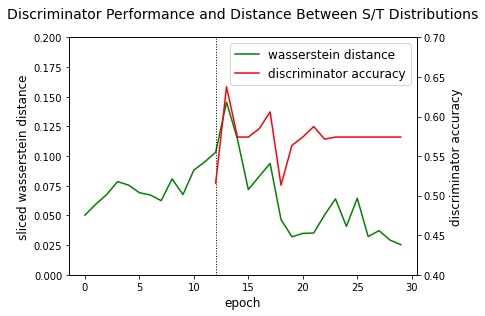

In [59]:
x_vals = list(range(len(w_dists)))
x_vals_disc = x_vals[12:]

fig, ax1 = plt.subplots(figsize=(6.5, 4.5))
w, = ax1.plot(x_vals, w_dists, color='green')
ax1.set_ylim(0, 0.2)
ax1.set_ylabel('sliced wasserstein distance', fontsize=12)
ax1.set_xlabel('epoch', fontsize=12)
ax1.axvline(x=12, linestyle='dotted', color='k', linewidth=1)
ax2 = ax1.twinx()
d, = ax2.plot(x_vals_disc, disc_accs, color='red')
ax2.set_ylim(0.4, 0.7)
ax2.set_ylabel('discriminator accuracy', fontsize=12)
ax1.legend(handles=[w, d], labels=['wasserstein distance', 'discriminator accuracy'], fontsize=12)
plt.title('Discriminator Performance and Distance Between S/T Distributions', pad=20, fontsize=14)
plt.tight_layout()


In [5]:
sup_source_preds = np.load('data/p0_0_preds.npy', allow_pickle=True)
sup_target_preds = np.load('data/p0_1_preds.npy', allow_pickle=True)

da_source_preds = np.load('data/p1_0_preds.npy', allow_pickle=True)
da_target_preds = np.load('data/p1_1_preds.npy', allow_pickle=True)

source_ratios = np.load('data/0_ratios.npy', allow_pickle=True)
target_ratios = np.load('data/1_ratios.npy', allow_pickle=True)

In [86]:
all_ratios = np.append(source_ratios, target_ratios, axis=0)
all_sup_preds = np.concatenate((sup_source_preds, sup_target_preds), axis=0)
all_da_preds = np.concatenate((da_source_preds, da_target_preds), axis=0)

sup_norm = StandardScaler()
sup_norm.fit(all_sup_preds)
all_sup_preds_norm = sup_norm.transform(all_sup_preds)
sup_source_preds_norm = sup_norm.transform(sup_source_preds)
sup_target_preds_norm = sup_norm.transform(sup_target_preds)

da_norm = StandardScaler()
da_norm.fit(all_da_preds)
all_da_preds_norm = da_norm.transform(all_da_preds)
da_source_preds_norm = da_norm.transform(da_source_preds)
da_target_preds_norm = da_norm.transform(da_target_preds)

sup_reducer = umap.UMAP(n_neighbors=15, min_dist=0.3)
sup_reducer.fit(all_sup_preds_norm)
da_reducer = umap.UMAP(n_neighbors=15, min_dist=0.3)
da_reducer.fit(all_da_preds_norm)

UMAP(min_dist=0.3, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [87]:
sup_source_proj = sup_reducer.transform(sup_source_preds_norm)
sup_target_proj = sup_reducer.transform(sup_target_preds_norm)

In [88]:
da_source_proj = da_reducer.transform(da_source_preds_norm)
da_target_proj = da_reducer.transform(da_target_preds_norm)

Text(0.5, 0.98, 'UMap Projection of Source and Target Embedding Distributions')

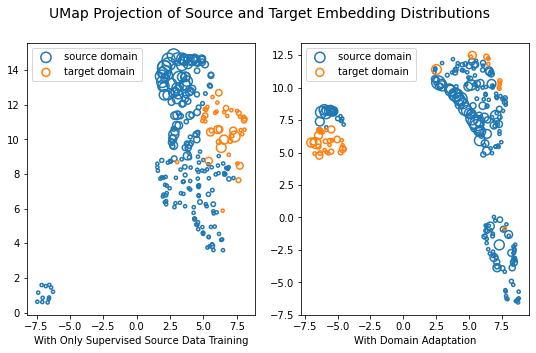

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))

s = ax1.scatter(sup_source_proj[:, 0], sup_source_proj[:, 1], s=source_sizes, facecolors='none', edgecolors='tab:blue', linewidths=1.5)
t = ax1.scatter(sup_target_proj[:, 0], sup_target_proj[:, 1], s=target_sizes, facecolors='none', edgecolors='tab:orange', linewidths=1.5)
ax1.set_xlabel('With Only Supervised Source Data Training')
ax1.legend([s, t], ['source domain', 'target domain'], loc='upper left')

s = ax2.scatter(da_source_proj[:, 0], da_source_proj[:, 1], s=source_sizes, facecolors='none', edgecolors='tab:blue', linewidths=1.5)
t = ax2.scatter(da_target_proj[:, 0], da_target_proj[:, 1], s=target_sizes, facecolors='none', edgecolors='tab:orange', linewidths=1.5)
ax2.set_xlabel('With Domain Adaptation')
ax2.legend([s, t], ['source domain', 'target domain'], loc='upper left')

fig.suptitle('UMap Projection of Source and Target Embedding Distributions', fontsize=14)

Let's try PCA instead.

In [82]:
from sklearn.decomposition import PCA, FastICA

In [83]:
# sup_pca = PCA(n_components=2)
# sup_pca.fit(all_sup_preds_norm)
# print(sup_pca.explained_variance_ratio_)
# da_pca = PCA(n_components=2)
# da_pca.fit(all_da_preds_norm)
# print(da_pca.explained_variance_ratio_)

sup_pca = FastICA(n_components=2)
sup_pca.fit(all_sup_preds_norm)
da_pca = FastICA(n_components=2)
da_pca.fit(all_da_preds_norm)

c:\Users\georg\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
c:\Users\georg\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


FastICA(n_components=2)

In [84]:
sup_source_proj = sup_pca.transform(sup_source_preds_norm)
sup_target_proj = sup_pca.transform(sup_target_preds_norm)
da_source_proj = da_pca.transform(da_source_preds_norm)
da_target_proj = da_pca.transform(da_target_preds_norm)

Text(0.5, 0.98, 'UMap Projection of Source and Target Embedding Distributions')

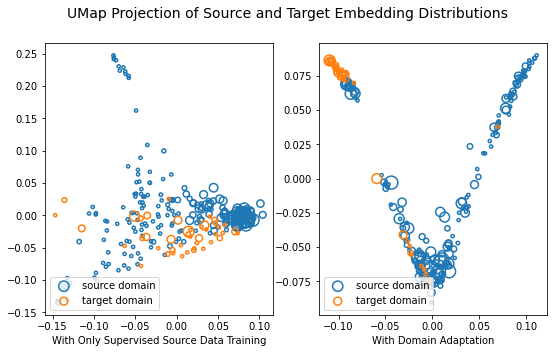

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))

s = ax1.scatter(sup_source_proj[:, 0], sup_source_proj[:, 1], s=source_sizes, facecolors='none', edgecolors='tab:blue', linewidths=1.5)
t = ax1.scatter(sup_target_proj[:, 0], sup_target_proj[:, 1], s=target_sizes, facecolors='none', edgecolors='tab:orange', linewidths=1.5)
ax1.set_xlabel('With Only Supervised Source Data Training')
ax1.legend([s, t], ['source domain', 'target domain'], loc='lower left')

s = ax2.scatter(da_source_proj[:, 0], da_source_proj[:, 1], s=source_sizes, facecolors='none', edgecolors='tab:blue', linewidths=1.5)
t = ax2.scatter(da_target_proj[:, 0], da_target_proj[:, 1], s=target_sizes, facecolors='none', edgecolors='tab:orange', linewidths=1.5)
ax2.set_xlabel('With Domain Adaptation')
ax2.legend([s, t], ['source domain', 'target domain'], loc='lower left')

fig.suptitle('UMap Projection of Source and Target Embedding Distributions', fontsize=14)